In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table
from scipy.spatial import distance
from scipy import spatial
from scipy.spatial import KDTree
import time
import matplotlib.path as mpltPath
from pandas import DataFrame, read_csv
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
from scipy import spatial
from scipy.spatial import KDTree

In [2]:
file = r'Cat_GAIA200pc_2MASS_SDSS_v1_XmatchSimbad.csv'
df = pd.read_csv(file)
df2 = df.columns.get_values()
df2.tolist()

C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['angDist',
 'col1',
 'solution_id',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_good_obs_ac',
 'astrometric_n_bad_obs_al',
 'astrometric_n_bad_obs_ac',
 'astrometric_delta_q',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_primary_flag',
 'astrometric_relegation_factor',
 'astrometric_weight_al',
 'astrometric_weight_ac',
 'astrometric_priors_used',
 'matched_observations',
 'duplicated_source',
 'scan_direction_strength_k1',
 'scan_direction_strength_k2',
 'scan_direction_strength_k3',
 'scan_direction_strength_k4',
 'scan_direction_mean_k1',
 

In [3]:
Gmag = df["phot_g_mean_mag"].values
Jmag = df["j_m"]
Kmag = df["ks_m"]
Plx = df["parallax"]
Dist = 1000/Plx 
AbsGmag = []
AbsJmag = []
AbsKmag = []
for i in range(len(Dist)): 
    
    AbsGmag.append(Gmag[i] + 5 - 5*np.log10(Dist[i]))

    AbsJmag.append(Jmag[i] + 5 - 5*np.log10(Dist[i]))

    AbsKmag.append(Kmag[i] + 5 - 5*np.log10(Dist[i]))

print('Finished converting Apparent Magnitudes to Absolute Magnitudes')

Finished converting Apparent Magnitudes to Absolute Magnitudes


In [120]:
import random

AbMags = np.transpose(np.array([[AbsGmag,AbsJmag,AbsKmag]]))
data = np.random.rand(2,1000)*20
#print(data)
data = np.transpose(data)
#print(data[0])
starData = []
for i in range(len(data)):
    index = np.random.randint(len(AbMags), size=1)
    mags = np.array(AbMags[index,:])
    
    ar1 = data[i,0]
    ar2 = data[i,1]
    ar = [ar1,ar2]
    for j in range(len(mags[0])):
        ar.append(mags[0][j][0])
    #print(ar)
    starData.append(ar)
starData = np.array(starData)
print(starData[0])
print(data[0])    

[10.38600717  7.70135596  3.95072496  2.32418802  2.00618818]
[10.38600717  7.70135596]


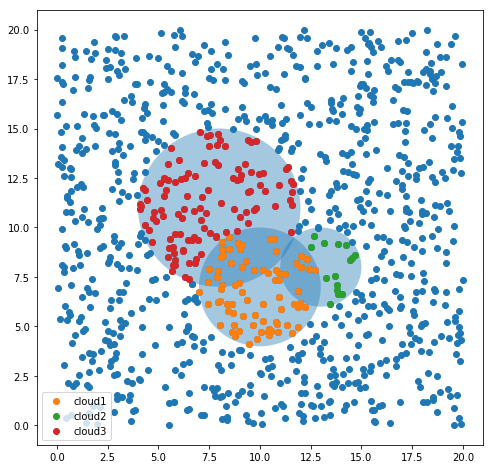

In [219]:
import numpy as np
import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon, Ellipse
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import matplotlib.patches as matpatches


fig, ax = plt.subplots(figsize=(8, 8))
patches1 = []
patches2 = []
patches3 = []
ax.scatter(starData[:,0],starData[:,1])

circle1 = Circle((10,7), 3)
circle2 = Circle((13,8), 2)
circle3 = Circle((8,11), 4)

patches1.append(circle1)
patches2.append(circle2)
patches3.append(circle3)

verts1 = patches1[0].get_verts()
poly1 = verts1
path1 = mpltPath.Path(poly1,closed=True)
inside1 = path1.contains_points(np.transpose([starData[:,0],starData[:,1]]))

verts2 = patches2[0].get_verts()
poly2 = verts2
path2 = mpltPath.Path(poly2,closed=True)
inside2 = path2.contains_points(np.transpose([starData[:,0],starData[:,1]]))

verts3 = patches3[0].get_verts()
poly3 = verts3
path3 = mpltPath.Path(poly3,closed=True)
inside3 = path3.contains_points(np.transpose([starData[:,0],starData[:,1]]))

p1 = PatchCollection(patches1, cmap=matplotlib.cm.jet, alpha=0.4)
#p1.set_array(np.array(colors))
ax.add_collection(p1)

p2 = PatchCollection(patches2, cmap=matplotlib.cm.jet, alpha=0.4)
#p2.set_array(np.array(colors))
ax.add_collection(p2)

p3 = PatchCollection(patches3, cmap=matplotlib.cm.jet, alpha=0.4)
#p3.set_array(np.array(colors))
ax.add_collection(p3)

cloud1 = []
cloud2 = []
cloud3 = []
outside = []
for j in range(len(inside1)):
    if(inside1[j] == True):
        cloud1.append(starData[j])
    elif(inside2[j] == True):
        cloud2.append(starData[j])
    elif(inside3[j] == True):
        cloud3.append(starData[j])
    else:
        outside.append(starData[j])
        
cloud1 = (np.array(cloud1))
cloud2 = (np.array(cloud2))
cloud3 = (np.array(cloud3))
outside = np.array(outside)
c1 = ax.scatter(cloud1[:,0],cloud1[:,1],label='cloud1')
c2 = ax.scatter(cloud2[:,0],cloud2[:,1],label='cloud2')
c3 = ax.scatter(cloud3[:,0],cloud3[:,1],label='cloud3')

plt.legend(handles=[c1,c2,c3])
plt.show()


In [9]:
cloud1[0]

array([3.73330515, 0.31784499, 5.65142753, 4.46973824, 3.93273759])

In [206]:
def add_extinction(Ao,starData):
    Ga1 = 0.882095056
    Ga2 = -0.086780236
    Ga3 = 0.01511573
    Ga4 = -0.002963829
    Ga5 = -0.027054718
    Ga6 = 0.000544945
    Ga7 = 0.002604135

    Ja1 = 0.243062354
    Ja2 = -0.001899476
    Ja3 = 0.000140615
    Ja4 = 2.5*10**(-5)
    Ja5 = -0.000269124
    Ja6 = 8.45*10**(-7)
    Ja7 = 4.86*10**(-6)

    Ka1 = 0.086025432
    Ka2 = 9.23*10**(-5)
    Ka3 = 3.32*10**(-6)
    Ka4 = -1.65*10**(-5)
    Ka5 = -2*10**(-5)
    Ka6 = 0.0
    Ka7 = 0.0
    
    Ext_mags = []
    for i in range(len(starData)):
        X = starData[i,2] - starData[i,4]
        k_G = Ga1 + Ga2*X + Ga3*X**2 + Ga4*X**3 + Ga5*Ao + Ga6*Ao**2 + Ga7*X*Ao
        k_J = Ja1 + Ja2*X + Ja3*X**2 + Ja4*X**3 + Ja5*Ao + Ja6*Ao**2 + Ja7*X*Ao
        k_Ks = Ka1 + Ka2*X + Ka3*X**2 + Ka4*X**3 + Ka5*Ao + Ka6*Ao**2 + Ka7*X*Ao
        GJ_ext = (starData[i,2] - starData[i,3]) + (k_G - k_J)*Ao
        GK_ext = X + (k_G - k_Ks)*Ao
        Ext_mags.append([0.0,GJ_ext,GK_ext])
    Ext_mags = np.array(Ext_mags)
    return Ext_mags

In [47]:
Ext_cloud1 = add_extinction(5,cloud1)
print(Ext_cloud1[0])
print(cloud1[0,2]-cloud1[0,3])

[0.         3.34732226 4.62143711]
1.2312783194205448


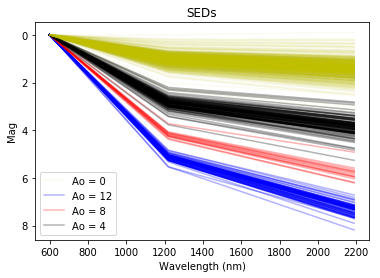

In [229]:
EffWave = [600,1220,2190]
Mags1 = []
Mags2 = []
Mags3 = []
Mags4 = []

A1 = 12
A2 = 8
A3 = 4
cloud1_ext = add_extinction(A1,cloud1)
cloud2_ext = add_extinction(A2,cloud2)
cloud3_ext = add_extinction(A3,cloud3)


for j in range(len(cloud1_ext)):
    c1, = plt.plot(EffWave,cloud1_ext[j],c='b',alpha = .3,label='Ao = %i' %(A1))
    
for i in range(len(cloud2_ext)):
    c2, = plt.plot(EffWave,cloud2_ext[i],c='r',alpha = .3,label='Ao = %i' %(A2))
    
for i in range(len(cloud3_ext)):
    c3, = plt.plot(EffWave,cloud3_ext[i],c='k',alpha = .3,label='Ao = %i' %(A3))
    
for i in range(len(outside)):
    G = outside[i,2] - outside[i,2]
    GJ = outside[i,2] - outside[i,3]
    GK = outside[i,2] - outside[i,4]
    Mags4.append([G,GJ,GK])

for j in range(len(Mags4)):
    out, = plt.plot(EffWave,Mags4[j],c='y',alpha = .05,label=('Ao = 0'))
    
plt.gca().invert_yaxis()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Mag')
plt.title('SEDs')
plt.legend(handles=[out,c1,c2,c3])
plt.show()

In [69]:
test = add_extinction(0,outside)
print(test[0])
print(outside[0,2]-outside[0,4])

[0.         1.23147199 1.7164726 ]
1.7164725985936755


In [230]:
ext_data = []
outside_ext = add_extinction(0,outside)

for i in range(len(cloud1)):
    GK = cloud1[i,2] - cloud1[i,4]
    GJ = cloud1[i,2] - cloud1[i,3]
    GK_ext = cloud1_ext[i,2]
    GJ_ext = cloud1_ext[i,1]
    diff_GK = GK_ext - GK
    diff_GJ = GJ_ext - GJ
    if(str(diff_GK) != 'nan' and str(diff_GJ) != 'nan'):
        ext_data.append([cloud1[i,0],cloud1[i,1],diff_GK,diff_GJ])

for i in range(len(cloud2)):
    GK = cloud2[i,2] - cloud2[i,4]
    GJ = cloud2[i,2] - cloud2[i,3]
    GK_ext = cloud2_ext[i,2]
    GJ_ext = cloud2_ext[i,1]
    diff_GK = GK_ext - GK
    diff_GJ = GJ_ext - GJ
    if(str(diff_GK) != 'nan' and str(diff_GJ) != 'nan'):
        ext_data.append([cloud2[i,0],cloud2[i,1],diff_GK,diff_GJ])

for i in range(len(cloud3)):
    GK = cloud3[i,2] - cloud3[i,4]
    GJ = cloud3[i,2] - cloud3[i,3]
    GK_ext = cloud3_ext[i,2]
    GJ_ext = cloud3_ext[i,1]
    diff_GK = GK_ext - GK
    diff_GJ = GJ_ext - GJ
    if(str(diff_GK) != 'nan' and str(diff_GJ) != 'nan'):
        ext_data.append([cloud3[i,0],cloud3[i,1],diff_GK,diff_GJ])
    
for i in range(len(outside)):
    GK = outside[i,2] - outside[i,4]
    GJ = outside[i,2] - outside[i,3]
    GK_ext = outside_ext[i,2]
    GJ_ext = outside_ext[i,1]
    diff_GK = GK_ext - GK
    diff_GJ = GJ_ext - GJ
    if(str(diff_GK) != 'nan' and str(diff_GJ) != 'nan'):
        ext_data.append([outside[i,0],outside[i,1],diff_GK,diff_GJ])

    



ext_data = np.array(ext_data)
#print(ext_data[165])

mag_data = np.transpose(np.array([ext_data[:,2],ext_data[:,3]]))

print(len(mag_data),len(ext_data))
print(ext_data[120])

990 990
[ 9.78677021 10.97096191  2.48266165  1.86693546]


[[0.57968761 0.85893672 1.42527629 ... 2.02676882 2.14899797 2.21302534]
 [0.47383953 0.75557805 1.42536762 ... 1.96320888 1.99423822 2.0182358 ]
 [0.4411739  0.6968848  1.45380793 ... 1.82501909 1.86122596 1.98475149]
 ...
 [0.39956706 0.65467295 1.29393311 ... 1.50787632 1.81644925 1.95638394]
 [0.4015212  0.77586922 1.38468502 ... 1.6481617  1.78396664 2.03859051]
 [0.49437743 0.92572876 1.47339536 ... 1.77403788 1.80022424 2.13679403]]
10000


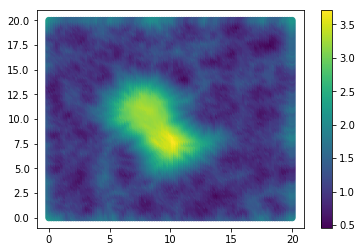

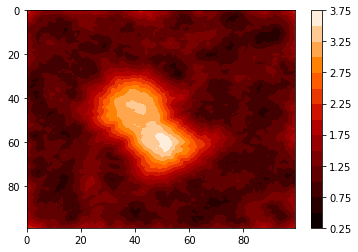

In [231]:
S = 100
x = np.linspace(0,20,S)
y = np.linspace(0,20,S)
X, Y = np.meshgrid(x,y)
XY = [X,Y]
XY = np.transpose(XY)
grid = XY[0]

for j in range(1,len(XY)):
    grid = np.vstack((grid,XY[j]))
    
grid4d = np.array([grid[0,0],grid[0,1],0,0])
for g in range(1,len(grid)):
    grid4d = np.vstack((grid4d,[grid[g,0],grid[g,1],0,0]))



# c = np.array([[1,1],[2,2]])
# d = np.array([[3,3],[4,4],[5,5]])

k = 8
tree = KDTree(ext_data)
dist, ind = tree.query(grid4d, k=k)
print(dist)
print(len(grid4d))
distArray = []
for d in range(len(dist)):
    distArray.append(dist[d][k-1])
plt.scatter(grid4d[:,0],grid4d[:,1],c=distArray)
plt.colorbar()
plt.show()
distArray = np.reshape(distArray,(-1,S))
distArray = np.rot90(distArray)
fig, ax = plt.subplots()
ax.set_facecolor('black')
plt.contourf(distArray,15,cmap='gist_heat')
plt.colorbar()
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.show()

In [195]:
inside1 = path1.contains_points(np.transpose([grid4d[:,0],grid4d[:,1]]))
inside2 = path2.contains_points(np.transpose([grid4d[:,0],grid4d[:,1]]))
inside3 = path3.contains_points(np.transpose([grid4d[:,0],grid4d[:,1]]))

c1_grid = []
c2_grid = []
c3_grid = []
out_grid = []
print(grid4d[0])
for j in range(len(inside1)):
    if(inside1[j] == True):
        c1_grid.append(dist[j,k-1])
    elif(inside2[j] == True):
        c2_grid.append(dist[j,k-1])
    elif(inside3[j] == True):
        c3_grid.append(dist[j,k-1])
    else:
        out_grid.append(dist[j,k-1])
test = 0
for i in range(len(inside3)):
    if(inside1[i] == True):
        test = test + 1
print(test)
np.size(grid4d)
        # for i in range(len(c1_grid)):
#     ext_dist.append([3.0,])

[0. 0. 0. 0.]
686


40000